TASK 2

IMPORT CLASS , API KEY

In [15]:
# Import class
from langchain_google_genai import ChatGoogleGenerativeAI
import os

# Set the API key
os.environ["GOOGLE_API_KEY"] = "API KEY"

# Initialize the Gemini model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash-preview-04-17"
)

IMMPORT LIBRARIES

In [195]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
import requests
from langchain_core.messages import SystemMessage, HumanMessage
from langgraph.graph import MessagesState

from langgraph.prebuilt import ToolNode, tools_condition

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

In [21]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

Different functions for calculation and weather.

In [23]:
def get_weather(city: str) -> str:
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"


In [25]:
def calculator(expression:str)->float:
    """Evaluate math expressions using BODMAS rules."""
    return eval(expression)

In [27]:
def multiply(a:int,b:int)->int:
 """Multiply a and b"""
 return a*b

def add(a:int,b:int)->int:
 """Add a and b"""
 return a + b
def divide(a: int, b: int) -> str:
    """Divide b by a"""
    if b != 0:
        return str(b / a)
    else:
        return "NOT PSBL"

def subtract(a:int,b:int)->int: 
 """Subtract a from b """
 return b-a;
    

TOOLS

In [29]:
tools = [calculator, add, multiply,subtract,divide]
llm_with_tools = llm.bind_tools(tools)
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [31]:
from langgraph.prebuilt import ToolNode, tools_condition

Graph building

In [33]:
graph_builder = StateGraph(State)

In [35]:
#nodes added
graph_builder.add_node("assistant",chatbot)
graph_builder.add_node("tools",ToolNode(tools))

In [37]:
#edges
graph_builder.add_edge(START,"assistant")
graph_builder.add_conditional_edges("assistant",tools_condition)
graph_builder.add_edge("tools","assistant")

In [39]:
react_graph=graph_builder.compile()

IMAGE OF GRAPH

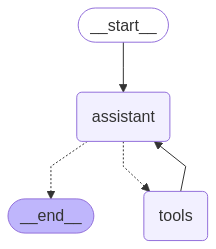

In [41]:
display(Image(react_graph.get_graph().draw_mermaid_png()))

AN EXAMPLE

In [43]:
response = react_graph.invoke({"messages": [HumanMessage(content=" Multiply 8 by 2 and add 5 to ans obtain earlier.Tell me weather in newdelhi")]})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

 Multiply 8 by 2 and add 5 to ans obtain earlier.Tell me weather in newdelhi
================================== Ai Message ==================================
Tool Calls:
  multiply (e7ab86e7-aca2-49fc-98ea-4344f3f6285d)
 Call ID: e7ab86e7-aca2-49fc-98ea-4344f3f6285d
  Args:
    a: 8.0
    b: 2.0
================================= Tool Message =================================
Name: multiply

16
================================== Ai Message ==================================
Tool Calls:
  add (8edc7fce-1f2d-4249-99bc-b9c757232db7)
 Call ID: 8edc7fce-1f2d-4249-99bc-b9c757232db7
  Args:
    a: 16.0
    b: 5.0
================================= Tool Message =================================
Name: add

21
================================== Ai Message ==================================

Multiplying 8 by 2 gives 16. Adding 5 to 16 gives 21. I cannot tell you the weather in New Delhi as I do not have access to a we

FASHION AND WEATHER API ARE ADDED

In [45]:
from langchain_community.utilities import OpenWeatherMapAPIWrapper

In [47]:
os.environ["OPENWEATHERMAP_API_KEY"] = "OPENWEATHERMAP API KEY"
weather = OpenWeatherMapAPIWrapper()

In [49]:
from langchain_community.tools import DuckDuckGoSearchRun

In [207]:
def fashion(q: str):
    """Search Fashion trend using fashion tool.
    Give just main points."""
    search = DuckDuckGoSearchRun()
    return search.invoke(q)

A NEW GRAPH IS MADE USING WEATHER AND FASHION AND MATH TOOLS

In [209]:
tools.append(weather.run)
tools.append(fashion)
llm_with_tools = llm.bind_tools(tools)
graph_builder1 = StateGraph(State)
graph_builder1.add_node("assistant",chatbot)
graph_builder1.add_edge(START,"assistant")
graph_builder1.add_node("tools",ToolNode(tools))



graph_builder1.add_conditional_edges("assistant",tools_condition)
graph_builder1.add_edge("tools","assistant")
react_graph1=graph_builder1.compile()

Examples illustarting routing logic 

In [55]:
response1 = react_graph1.invoke({"messages": [HumanMessage(content=" Tell me weather in delhi and do this 4/5*2")]})
for m in response1['messages']:
    m.pretty_print()

================================ Human Message =================================

 Tell me weather in delhi and do this 4/5*2
================================== Ai Message ==================================
Tool Calls:
  run (98b44035-960f-4880-852b-f1c3996d1c49)
 Call ID: 98b44035-960f-4880-852b-f1c3996d1c49
  Args:
    location: delhi
  calculator (988d0cc7-b7df-4049-97bd-febd778783f7)
 Call ID: 988d0cc7-b7df-4049-97bd-febd778783f7
  Args:
    expression: 4/5*2
================================= Tool Message =================================
Name: run

In delhi, the current weather is as follows:
Detailed status: haze
Wind speed: 4.12 m/s, direction: 100°
Humidity: 41%
Temperature: 
  - Current: 37.05°C
  - High: 37.05°C
  - Low: 37.05°C
  - Feels like: 41.73°C
Rain: {}
Heat index: None
Cloud cover: 20%
================================= Tool Message =================================
Name: calculator

1.6
================================== Ai Message ==================================


In [211]:
response1 = react_graph1.invoke({"messages": [HumanMessage(content=" what are fashion trends in Tokyo.Give just in summary.")]})
for m in response1['messages']:
    m.pretty_print()

================================ Human Message =================================

 what are fashion trends in Tokyo.Give just in summary.
================================== Ai Message ==================================
Tool Calls:
  fashion (14b9498c-a65f-4c63-bdff-6869fee5bf3f)
 Call ID: 14b9498c-a65f-4c63-bdff-6869fee5bf3f
  Args:
    q: fashion trends in Tokyo
================================= Tool Message =================================
Name: fashion

I just got back from Tokyo, and it confirmed what I've always known: When it comes to fashion, Japanese girls are at least two steps ahead.While Paris is still synonymous with quiet luxury and effortless tailoring, Tokyo is rewriting the spring style playbook in real time—on the sidewalks, in subway stations, and through every impossibly cool cafe window in Kichijoji. Current Fashion Trends in Tokyo (2025) Here are some of the latest fashion movements sweeping the streets of Tokyo in 2025: Genderless Fashion: More youth are adopting

MEMORY ADDED TO CHATBOT

In [59]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

A new graph with memory

In [61]:
graph_builder2 = StateGraph(State)
graph_builder2.add_node("assistant",chatbot)
graph_builder2.add_edge(START,"assistant")
graph_builder2.add_node("tools",ToolNode(tools))
graph_builder2.add_conditional_edges("assistant",tools_condition)
graph_builder2.add_edge("tools","assistant")
react_graph1=graph_builder2.compile()
graph = graph_builder2.compile(checkpointer=memory)

Some examples

In [63]:
config = {"configurable": {"thread_id": "1"}}

In [65]:
input = " My IIT  is IIT G,located in Guwahati"
response = graph.invoke(
    {"messages": [{"role": "user", "content": input}]},
    config
)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

 My IIT  is IIT G,located in Guwahati
================================== Ai Message ==================================

Okay, you are located at IIT G in Guwahati.


In [67]:
input1 = "tell my IIT?"
response = graph.invoke(
    {"messages": [{"role": "user", "content": input1}]},
    config
)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

 My IIT  is IIT G,located in Guwahati
================================== Ai Message ==================================

Okay, you are located at IIT G in Guwahati.
================================ Human Message =================================

tell my IIT?
================================== Ai Message ==================================

You mentioned your IIT is IIT G, located in Guwahati.


In [69]:
input1 = "tell me weather there?"
response = graph.invoke(
    {"messages": [{"role": "user", "content": input1}]},
    config
)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

 My IIT  is IIT G,located in Guwahati
================================== Ai Message ==================================

Okay, you are located at IIT G in Guwahati.
================================ Human Message =================================

tell my IIT?
================================== Ai Message ==================================

You mentioned your IIT is IIT G, located in Guwahati.
================================ Human Message =================================

tell me weather there?
================================== Ai Message ==================================
Tool Calls:
  run (aa6fbb1e-46f6-4232-969d-bf05037fd7e2)
 Call ID: aa6fbb1e-46f6-4232-969d-bf05037fd7e2
  Args:
    location: Guwahati
================================= Tool Message =================================
Name: run

In Guwahati, the current weather is as follows:
Detailed status: haze
Wind speed: 4.12 m/s, direction: 360°
Hu

MULTI AGENTS 

In [71]:
from langgraph.prebuilt import create_react_agent

In [73]:
def web_search(q: str):
    """Search """
    search = DuckDuckGoSearchRun()
    return search.invoke(q)

RESEARCH AGENT

In [101]:
research_agent = create_react_agent(
    model="google_genai:gemini-2.5-flash-preview-04-17",
    tools=[web_search],
    prompt=(
        "You are a research agent.\n\n"
        "INSTRUCTIONS:\n"
        "- Assist ONLY with research-related tasks, DO NOT do any math and weather related things\n"
        "- After you're done with your tasks, respond to the supervisor directly\n"
        "- Respond ONLY with the results of your work, do NOT include ANY other text."
    ),
    name="research_agent",
)


In [111]:
input1 = "tell me director of IIT GUWAHATI?"
response = research_agent.invoke(
    {"messages": [{"role": "user", "content": input1}]},
    
)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

tell me director of IIT GUWAHATI?
================================== Ai Message ==================================
Name: research_agent
Tool Calls:
  web_search (b8aa9801-7232-4979-8f39-9514722e89a4)
 Call ID: b8aa9801-7232-4979-8f39-9514722e89a4
  Args:
    q: director of IIT GUWAHATI
================================= Tool Message =================================
Name: web_search

Jalihal assumed the position of the director of IITG on 15 May 2024, succeeding Prof. Rajeev Ahuja (former Director of IIT Guwahati). Before Prof. Jalihal was appointed as the Director of IIT Guwahati, he was a Professor at the Department of Electrical Engineering, IIT Madras. IIT Guwahati suicide: Dean resigns, Director requests students to return to classes IIT Guwahati is now also establishing peer support groups, offering everyone a safe and confidential space to share their experiences and receive support from their peers

Math agent

In [103]:
math_agent = create_react_agent(
    model="google_genai:gemini-2.5-flash-preview-04-17",
   tools = [calculator, add, multiply,subtract,divide],
    prompt=(
        "You are a math agent.\n\n"
        "INSTRUCTIONS:\n"
        "- Assist ONLY with math-related tasks\n"
        "- After you're done with your tasks, respond to the supervisor directly\n"
        "- Respond ONLY with the results of your work, do NOT include ANY other text."
    ),
    name="math_agent",
)

Weather Agent

In [105]:
weather_agent = create_react_agent(
    model="google_genai:gemini-2.5-flash-preview-04-17",
   tools = [weather.run],
    prompt=(
        "You are a weather agent.\n\n"
        "INSTRUCTIONS:\n"
        "- Assist ONLY with weather-related tasks and do not do any maths and web search\n"
        "- After you're done with your tasks, respond to the supervisor directly\n"
        "- Respond ONLY with the results of your work, do NOT include ANY other text."
    ),
    name="weather_agent",
)

In [87]:
input1 = "what's (3 + 5) x 7"
response = math_agent.invoke(
    {"messages": [{"role": "user", "content": input1}]},
    config
)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

what's (3 + 5) x 7
================================== Ai Message ==================================
Name: math_agent
Tool Calls:
  calculator (72cbb6de-a8ba-4d10-82e9-db605b33ee56)
 Call ID: 72cbb6de-a8ba-4d10-82e9-db605b33ee56
  Args:
    expression: (3 + 5) * 7
================================= Tool Message =================================
Name: calculator

56
================================== Ai Message ==================================
Name: math_agent

56


Routing using supervisor

In [93]:
from langgraph_supervisor import create_supervisor

In [113]:
from langchain.chat_models import init_chat_model
config = {"configurable": {"thread_id": "1"}}

In [162]:
supervisor = create_supervisor(
    model=init_chat_model("google_genai:gemini-2.5-flash-preview-04-17"),
    agents=[research_agent, math_agent,weather_agent],
    prompt=(
        "You are a supervisor managing two agents:\n"
        "- a research agent. Assign research-related tasks to this agent. \n."
        "- a math agent. Assign math-related tasks to this agent\n"
        "- a  weather agent. Assign weather-related tasks to this agent.If location is needed , go to supervisor back to find location.\n"
        "Assign work to one agent at a time, do not call agents in parallel.\n"
        "Do not do any work yourself."
    ),
    add_handoff_back_messages=True,
    output_mode="full_history",
).compile(checkpointer=memory)

Graph describing connections

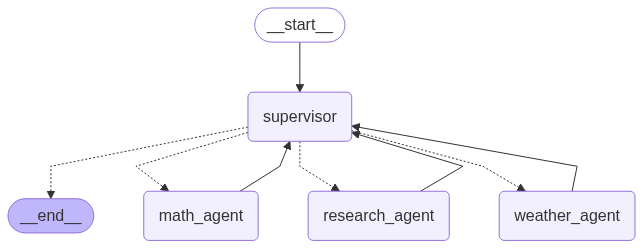

In [164]:
display(Image(supervisor.get_graph().draw_mermaid_png()))

Examples

In [185]:
config = {"configurable": {"thread_id": "12"}}

In [187]:
input1 = "Tell me GDP of Haryana and India. Tell me what percentage of India's GDP is haryana's GDP. tell weather at karnal."
          
response  =supervisor .invoke(
    {"messages": [{"role": "user", "content": input1}]},
    config
)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Tell me GDP of Haryana and India. Tell me what percentage of India's GDP is haryana's GDP. tell weather at karnal.
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_weather_agent (d0ba65aa-25a2-4a78-9675-e4e540196b80)
 Call ID: d0ba65aa-25a2-4a78-9675-e4e540196b80
  Args:
================================= Tool Message =================================
Name: transfer_to_weather_agent

Successfully transferred to weather_agent
================================== Ai Message ==================================
Name: weather_agent

I can get the weather at Karnal. However, I cannot provide you with the GDP information for Haryana and India or calculate the percentage.
================================== Ai Message ==================================
Name: weather_agent

Transferring back to supervisor
Tool Calls:
  transfer_back_to_superviso

In [189]:
input1 = "Add the haryana GDP and Punjab GDP. "
          
response  =supervisor .invoke(
    {"messages": [{"role": "user", "content": input1}]},
    config
)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Tell me GDP of Haryana and India. Tell me what percentage of India's GDP is haryana's GDP. tell weather at karnal.
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_weather_agent (d0ba65aa-25a2-4a78-9675-e4e540196b80)
 Call ID: d0ba65aa-25a2-4a78-9675-e4e540196b80
  Args:
================================= Tool Message =================================
Name: transfer_to_weather_agent

Successfully transferred to weather_agent
================================== Ai Message ==================================
Name: weather_agent

I can get the weather at Karnal. However, I cannot provide you with the GDP information for Haryana and India or calculate the percentage.
================================== Ai Message ==================================
Name: weather_agent

Transferring back to supervisor
Tool Calls:
  transfer_back_to_superviso

In [191]:
input1 = "Add the 5 and 3. "
          
response  =supervisor .invoke(
    {"messages": [{"role": "user", "content": input1}]},
    config
)
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Tell me GDP of Haryana and India. Tell me what percentage of India's GDP is haryana's GDP. tell weather at karnal.
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_weather_agent (d0ba65aa-25a2-4a78-9675-e4e540196b80)
 Call ID: d0ba65aa-25a2-4a78-9675-e4e540196b80
  Args:
================================= Tool Message =================================
Name: transfer_to_weather_agent

Successfully transferred to weather_agent
================================== Ai Message ==================================
Name: weather_agent

I can get the weather at Karnal. However, I cannot provide you with the GDP information for Haryana and India or calculate the percentage.
================================== Ai Message ==================================
Name: weather_agent

Transferring back to supervisor
Tool Calls:
  transfer_back_to_superviso